In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt



from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping


In [2]:
# documentation & examples 
# 1- https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/  #DNN
# 2- https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/  #LSTM
# 3- https://adamnovotny.com/notebooks/lstm_synthetic_data.html  #LSTM

In [3]:
df1 = pd.read_csv("IEC_2017-2022v2.csv") 

C:\Users\UAE12\AppData\Local\Temp\ipykernel_19872\3046774235.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("IEC_2017-2022v2.csv")


In [4]:
df2 = df1.loc[df1['community'] == 345]
df2.head()

,Unnamed: 0.1,Unnamed: 0,community,rate_category,calendar_month,consumption,consumption_periods,year,month,day
31370031,0,0,345.0,ENORATE,201201,0.000045,2017-03-22,2017.0,3.0,22.0
31370032,1,1,345.0,ENORATE,201202,0.004710,2017-03-22,2017.0,3.0,22.0
31370033,2,2,345.0,ENORATE,201203,0.009421,2017-03-22,2017.0,3.0,22.0
31370034,3,3,345.0,ENORATE,201204,0.014131,2017-03-22,2017.0,3.0,22.0
31370035,4,4,345.0,ENORATE,201205,0.018842,2017-03-22,2017.0,3.0,22.0


In [5]:
df = df2.iloc[:, [2, 3, 4, 5, 6]]
df.head()

,community,rate_category,calendar_month,consumption,consumption_periods
31370031,345.0,ENORATE,201201,0.000045,2017-03-22
31370032,345.0,ENORATE,201202,0.004710,2017-03-22
31370033,345.0,ENORATE,201203,0.009421,2017-03-22
31370034,345.0,ENORATE,201204,0.014131,2017-03-22
31370035,345.0,ENORATE,201205,0.018842,2017-03-22


In [6]:
df["rate_category"] = df["rate_category"].astype('category') # convert to object to category

C:\Users\UAE12\AppData\Local\Temp\ipykernel_19872\1204330131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["rate_category"] = df["rate_category"].astype('category') # convert to object to category


In [7]:
df["rate_category"] = df["rate_category"].cat.codes

C:\Users\UAE12\AppData\Local\Temp\ipykernel_19872\3704998175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["rate_category"] = df["rate_category"].cat.codes


In [8]:
df.head()

,community,rate_category,calendar_month,consumption,consumption_periods
31370031,345.0,1,201201,0.000045,2017-03-22
31370032,345.0,1,201202,0.004710,2017-03-22
31370033,345.0,1,201203,0.009421,2017-03-22
31370034,345.0,1,201204,0.014131,2017-03-22
31370035,345.0,1,201205,0.018842,2017-03-22


In [9]:
df = df.astype('float32')

ValueError: could not convert string to float: '2017-03-22'

In [9]:
length = df.shape[0]
lengthnew = length*0.2
print(int(lengthnew))

495616


In [10]:
dfnew = df.iloc[0:int(lengthnew)]
dfnew.head()

,community,rate_category,calendar_month,consumption
31370031,345.0,1,201201,0.000045
31370032,345.0,1,201202,0.004710
31370033,345.0,1,201203,0.009421
31370034,345.0,1,201204,0.014131
31370035,345.0,1,201205,0.018842


In [11]:
dfnew.shape

(495616, 4)

In [12]:
#XX = df.iloc[:, [0, 1, 2, 3]]
#yy = df.iloc[:, [3]]
#yy.head()

train_X = dfnew #.drop(columns=['consumption'])
train_X.head(3)

,community,rate_category,calendar_month,consumption
31370031,345.0,1,201201,0.000045
31370032,345.0,1,201202,0.004710
31370033,345.0,1,201203,0.009421


In [13]:
train_y = dfnew[['consumption']]
train_y.head()

,consumption
31370031,0.000045
31370032,0.004710
31370033,0.009421
31370034,0.014131
31370035,0.018842


In [14]:
#train_X = np.asanyarray(train_Xp).astype('float32')
#train_y = np.asanyarray(train_yp).astype('float32')


from sklearn.model_selection import train_test_split
train_X, X_test, train_y, y_test = train_test_split(train_X, train_y, test_size = 0.1)

In [41]:
n_cols = train_X.shape[1]

model = Sequential()
model.add(Dense(14, input_shape=(n_cols,), activation='softplus')) 
model.add(Dense(12, activation='softplus')) 
model.add(Dense(1))

In [58]:
model.compile(loss='mean_squared_logarithmic_error', optimizer='adam', metrics=['mse', 'mae', 'mape'])

early_stopping_monitor = EarlyStopping(patience=3)

In [59]:
model.fit(train_X, train_y,validation_split=0.1, epochs=30, batch_size=20, callbacks=[early_stopping_monitor])

Epoch 1/30
20073/20073 [==============================] - 29s 1ms/step - loss: 0.0226 - mse: 17204792.0000 - mae: 300.9601 - mape: 19126.1211 - val_loss: 0.3442 - val_mse: 486093792.0000 - val_mae: 2017.7517 - val_mape: 3755.8965
Epoch 2/30
20073/20073 [==============================] - 27s 1ms/step - loss: 0.0246 - mse: 24607860.0000 - mae: 358.8945 - mape: 17228.4434 - val_loss: 5.8117e-04 - val_mse: 1681205.8750 - val_mae: 105.2416 - val_mape: 67.6606
Epoch 3/30
20073/20073 [==============================] - 26s 1ms/step - loss: 0.0198 - mse: 11916727.0000 - mae: 233.7120 - mape: 177159.6875 - val_loss: 0.0014 - val_mse: 7669999.5000 - val_mae: 228.5814 - val_mape: 87.6934
Epoch 4/30
20073/20073 [==============================] - 26s 1ms/step - loss: 0.0167 - mse: 11301024.0000 - mae: 231.6696 - mape: 41161.2305 - val_loss: 0.0047 - val_mse: 19498850.0000 - val_mae: 389.4633 - val_mape: 63.3942
Epoch 5/30
20073/20073 [==============================] - 26s 1ms/step - loss: 0.0144 - m

In [18]:
#accuracy = model.evaluate(train_X, train_y)
#print('Accuracy: %.2f' % (accuracy*100))

In [60]:
predictions = model.predict(train_X)  

13940/13940 [==============================] - 10s 736us/step


In [62]:
print(predictions)

[[4813.374  ]
 [ 429.39145]
 [ 395.8524 ]
 ...
 [ 815.84454]
 [ 251.1922 ]
 [1331.0635 ]]


In [63]:
predictions.shape

(446054, 1)

In [64]:
train_X.shape

(446054, 4)

In [65]:
train_X.head()

,community,rate_category,calendar_month,consumption
0,345.0,0,201710,5129.494
1,345.0,0,201707,426.992
2,345.0,5,201711,390.778
3,345.0,5,201707,292.658
4,345.0,5,201702,209.000


In [66]:
pp = pd.DataFrame(predictions, columns=['predictedcon'])
pp.head()

,predictedcon
0,4813.374023
1,429.391449
2,395.852386
3,303.215149
4,219.762161


In [67]:
train_X.reset_index(drop=True, inplace=True)
pp.reset_index(drop=True, inplace=True)

In [68]:
popo = pd.concat([train_X, pp], axis=1)
popo.head()

,community,rate_category,calendar_month,consumption,predictedcon
0,345.0,0,201710,5129.494,4813.374023
1,345.0,0,201707,426.992,429.391449
2,345.0,5,201711,390.778,395.852386
3,345.0,5,201707,292.658,303.215149
4,345.0,5,201702,209.000,219.762161


In [69]:
df1 = popo[['consumption', 'community']]
df2 = popo[['predictedcon', 'community']]

                        sum
rate_category              
0              1.301888e+09
1              9.823812e+05
2              4.080010e+03
3              7.581257e+04
4              1.123585e+07
5              1.986498e+08
6              2.696645e+06


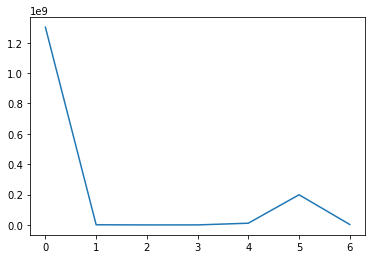

In [83]:
result1 = popo.groupby('rate_category')['consumption'].aggregate(['sum'])
print(result1)
plt.plot(result1)

                        sum
rate_category              
0              1.209470e+09
1              9.334604e+05
2              4.238095e+03
3              7.118802e+04
4              1.041936e+07
5              1.942673e+08
6              2.707518e+06


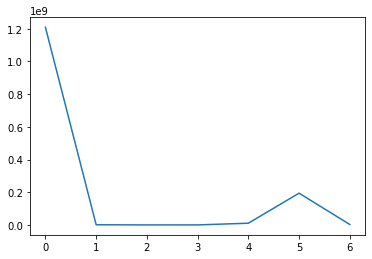

In [84]:
result2 = popo.groupby('rate_category')['predictedcon'].aggregate(['sum'])
print(result2)
plt.plot(result2)

In [99]:
popo.head(3)

,community,rate_category,calendar_month,consumption,predictedcon
0,345.0,0,201710,5129.494,4813.374023
1,345.0,0,201707,426.992,429.391449
2,345.0,5,201711,390.778,395.852386


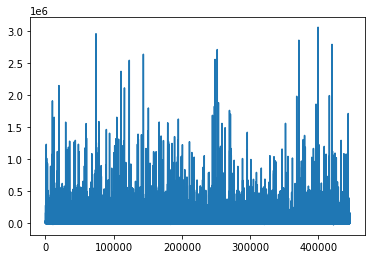

In [116]:
plt.plot(popo['consumption'])

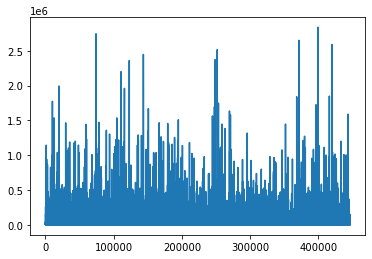

In [119]:
plt.plot(popo['predictedcon'])